In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
housing = fetch_california_housing()

In [3]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# **Exploratory Data Analysis (EDA)**

Get summary of the dataset

In [6]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Check missing values

In [7]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


Visualize relationships between features and the target variable:

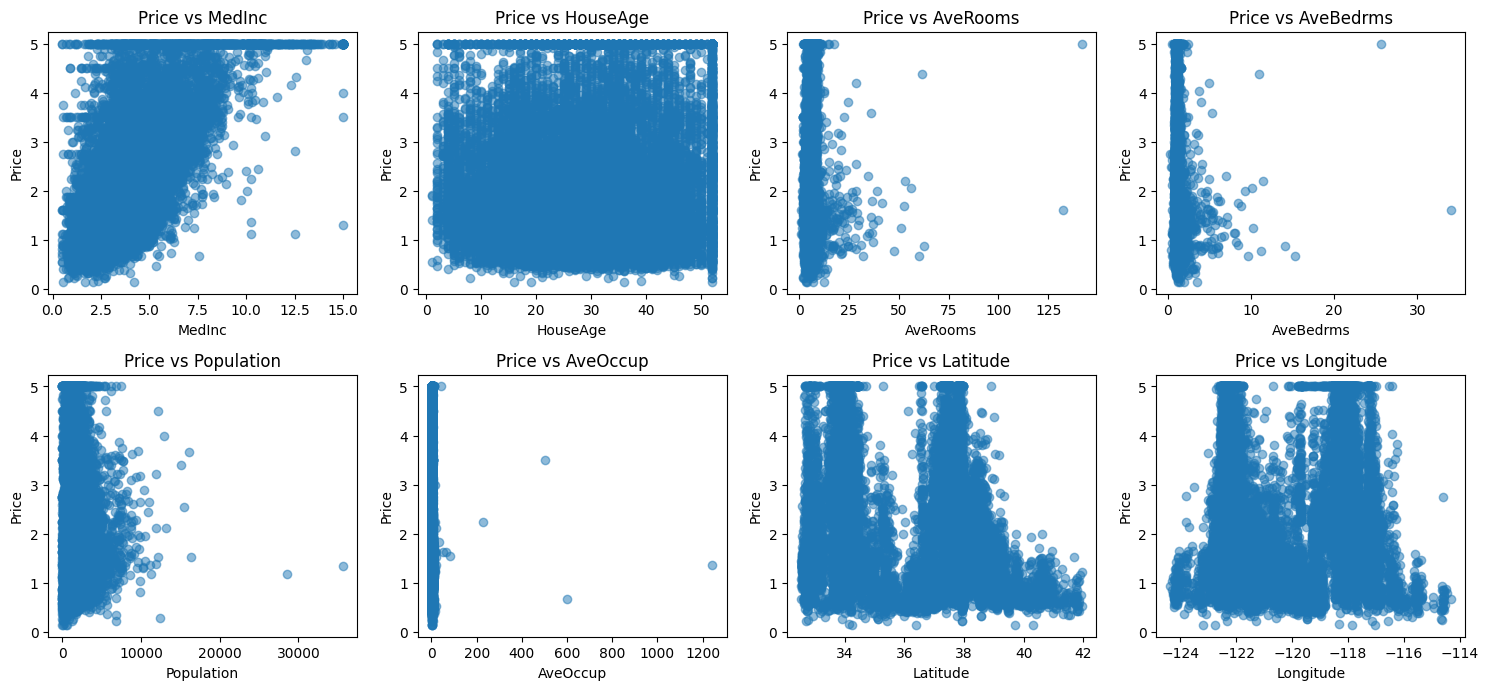

In [8]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    plt.scatter(df[col], df['price'], alpha=0.5)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

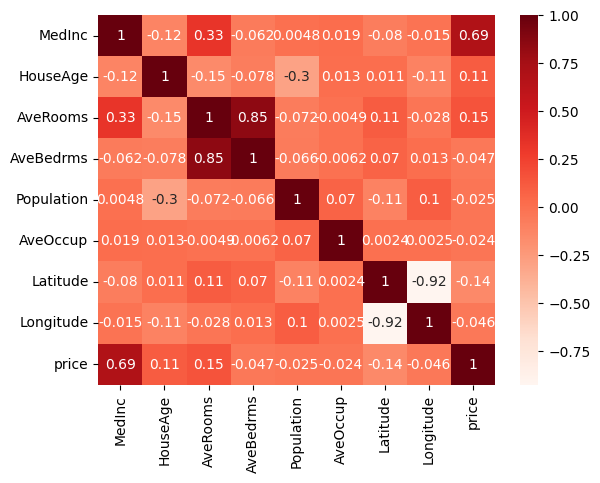

In [18]:
dataplot = sns.heatmap(df.corr(), cmap="Reds", annot=True)


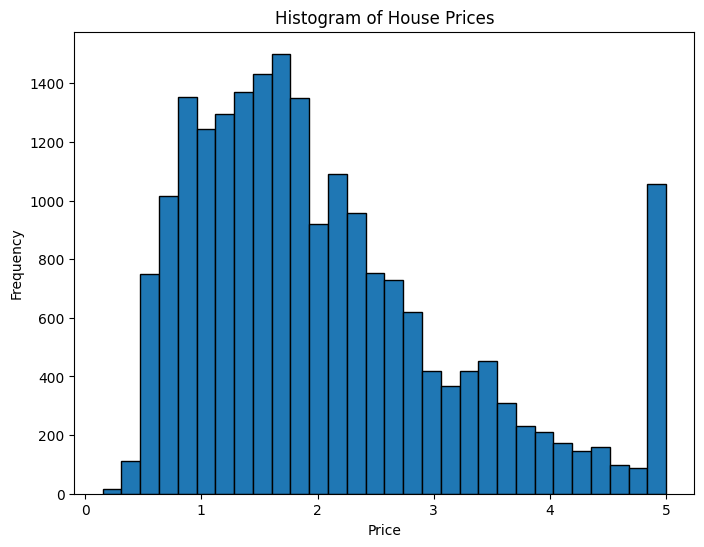

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()


Feature Engineering

In [19]:
df["incomeperPopulation"] = df["Population"] / df["MedInc"]
df["incomeperPopulation"]

,incomeperPopulation
0,38.677749
1,289.228323
2,68.344035
3,98.881820
4,146.898237
...,...
20635,541.562520
20636,139.236546
20637,592.352941
20638,396.850900


Scale numerical features


In [20]:
from sklearn.preprocessing import StandardScaler
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,incomeperPopulation
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,38.677749
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,289.228323
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,68.344035
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,98.881820
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,146.898237


In [21]:
scale=StandardScaler()
df_scale=scale.fit_transform(df)
df_scale=pd.DataFrame(df_scale,columns=[df.columns])
df_scale.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,incomeperPopulation
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631,-0.977823
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156,-0.381282
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693,-0.907190
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100,-0.834482
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900,-0.720159


In [22]:
df_scale.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,incomeperPopulation
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16,0.000000
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00,-1.067848
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01,-0.596288
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01,-0.276874
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01,0.282133
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00,31.949643


Split the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
df_train=df_scale
X = df_train.drop(columns=['price'])
Y = df_train["price"]
X_train, X_test, Y_train, Y_test = train_test_split( X,Y , random_state=104,test_size=0.2)

<ipython-input-23-c6eb5d7bfbae>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df_train.drop(columns=['price'])


# Building Machine Learning Models

LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_true = Y_test


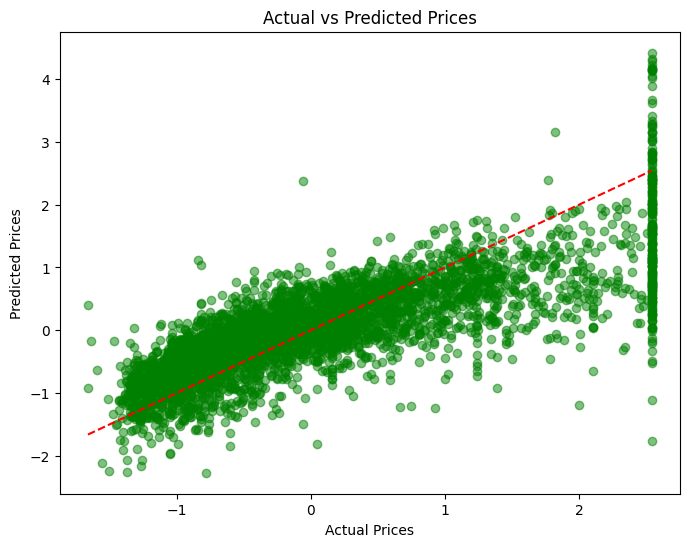

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test, y=y_pred, alpha=0.5,color="green")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [26]:
y_true = Y_test
mae=mean_absolute_error(y_true, y_pred)
mse=mean_squared_error(y_true, y_pred)
r2=r2_score(y_true, y_pred)
print("LinearRegression Evaluate ")
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
print("Model Score:",model.score(X_test, Y_test))

LinearRegression Evaluate 
MAE: 0.4697820322608386
MSE: 0.41001091750268276
R2: 0.6093623391735493
Model Score: 0.6093623391735493


DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


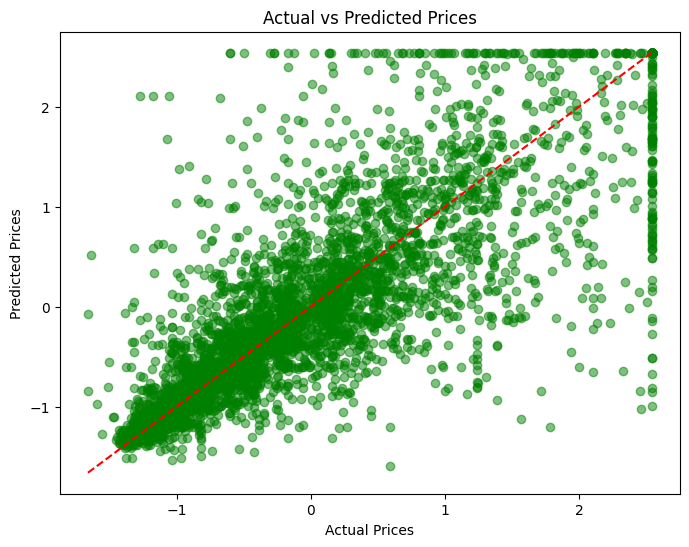

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test, y=y_pred, alpha=0.5,color="green")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [39]:
y_true = Y_test
mae=mean_absolute_error(y_true, y_pred)
mse=mean_squared_error(y_true, y_pred)
r2=r2_score(y_true, y_pred)
print("DecisionTreeRegressor Evaluate ")
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)
print("Model Score:",model.score(X_test, Y_test))

DecisionTreeRegressor Evaluate 
MAE: 0.40422443495715576
MSE: 0.41050366912502884
R2: 0.608892870354782
Model Score: 0.608892870354782


**Conclusion:**
The DecisionTreeRegressor is slightly better in terms of MAE, meaning it tends to have smaller average prediction errors. However, both models are very close in performance overall, with identical R² scores.
LinearRegression offers a simpler model with comparable performance but with slightly higher average prediction errors.
